In [6]:
!pip install tensorflow-gpu==2.0.0

In [7]:
import tensorflow as tf
tf.__version__

'2.0.0'

### customer leaving (final for dv p)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense


In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [12]:
dat = pd.read_csv('Churn_Modelling.csv')

In [13]:
dat.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fbda5abe0>,
      dtype=object)

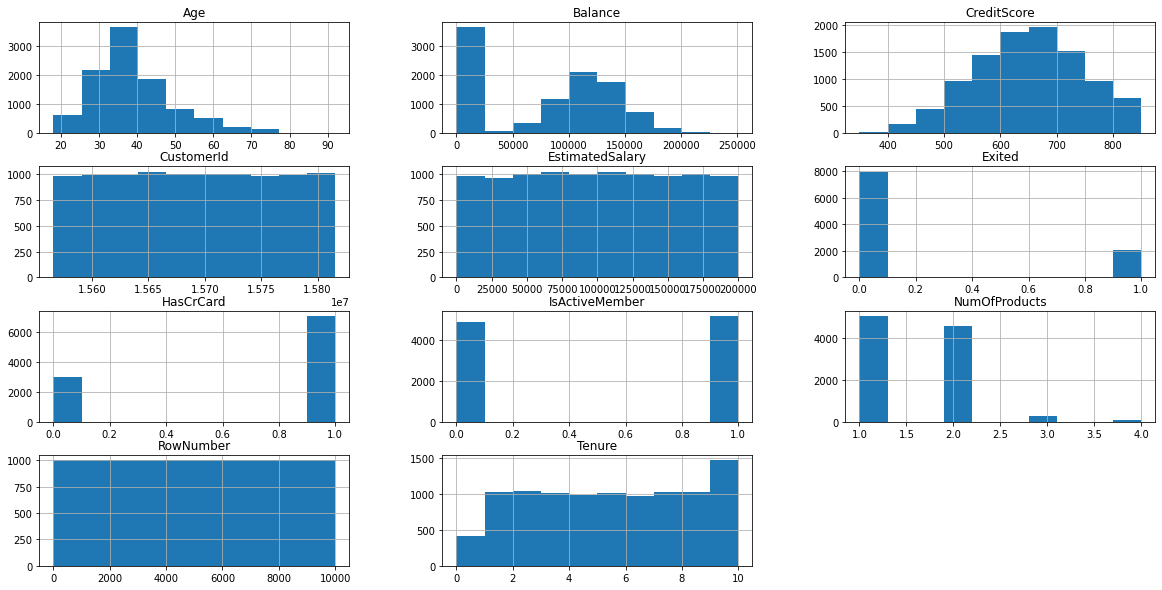

In [14]:
dat.hist(figsize=(20,10))

In [15]:
X = dat.drop(labels=['CustomerId','Surname','RowNumber','Exited'],axis=1)
Y = dat['Exited']

In [16]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [18]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fbd5a3e80>,
      dtype=object)

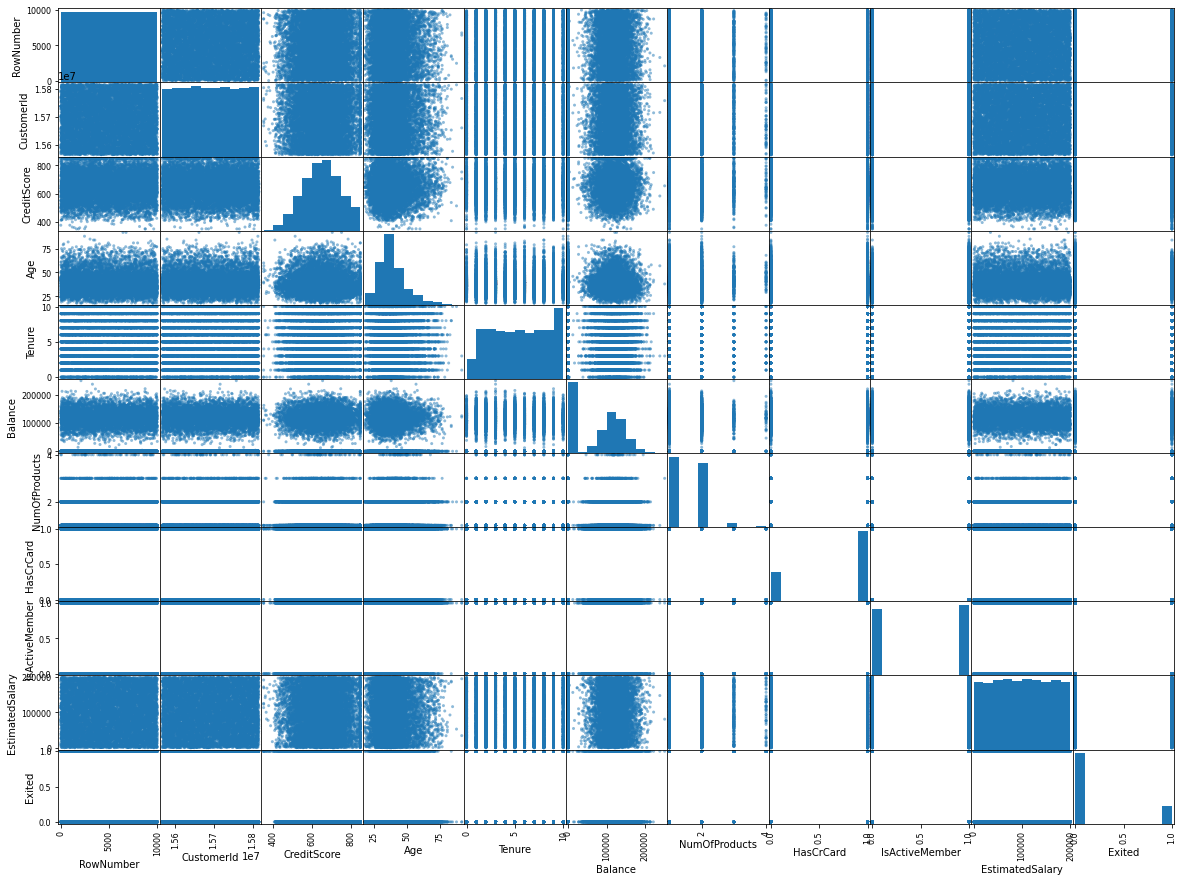

In [19]:
pd.plotting.scatter_matrix(dat, figsize=(20,15))

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label1 = LabelEncoder()
X['NumOfProducts'] = label1.fit_transform(X['NumOfProducts'])
lab3 = LabelEncoder()
X['Geography'] = lab3.fit_transform(X['Geography'])
label2 = LabelEncoder()
X['Gender'] = label2.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,0,1,1,101348.88
1,608,2,0,41,1,83807.86,0,0,1,112542.58
2,502,0,0,42,8,159660.80,2,1,0,113931.57
3,699,0,0,39,1,0.00,1,0,0,93826.63
4,850,2,0,43,2,125510.82,0,1,1,79084.10


In [22]:
X = pd.get_dummies(X,drop_first=True,columns=['NumOfProducts'])
X = pd.get_dummies(X,drop_first=True,columns=['Geography'])

In [23]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,101348.88,0,0,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,0,0,1
2,502,0,42,8,159660.80,1,0,113931.57,0,1,0,0,0
3,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,0,0,1


### Feature standardization

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y)

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [27]:
model = Sequential()
model.add(Dense(X.shape[1],activation='relu',input_dim=X.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# model = RandomForestClassifier()
# model.fit(x_train,y_train)

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# yprd = model.predict_proba(x_test)
# yprd

In [29]:
history = model.fit(x_train,y_train.to_numpy(),batch_size=10,epochs=10,verbose=1,validation_split=0.2)

Train on 5600 samples, validate on 1400 samples
Epoch 1/10
5600/5600 [==============================] - 2s 400us/sample - loss: 0.4284 - accuracy: 0.8186 - val_loss: 0.3480 - val_accuracy: 0.8543
Epoch 2/10
5600/5600 [==============================] - 1s 229us/sample - loss: 0.3725 - accuracy: 0.8445 - val_loss: 0.3423 - val_accuracy: 0.8593
Epoch 3/10
5600/5600 [==============================] - 1s 233us/sample - loss: 0.3590 - accuracy: 0.8555 - val_loss: 0.3425 - val_accuracy: 0.8693
Epoch 4/10
5600/5600 [==============================] - 1s 232us/sample - loss: 0.3548 - accuracy: 0.8537 - val_loss: 0.3265 - val_accuracy: 0.8736
Epoch 5/10
5600/5600 [==============================] - 1s 231us/sample - loss: 0.3497 - accuracy: 0.8587 - val_loss: 0.3493 - val_accuracy: 0.8629
Epoch 6/10
5600/5600 [==============================] - 1s 235us/sample - loss: 0.3469 - accuracy: 0.8580 - val_loss: 0.3221 - val_accuracy: 0.8736
Epoch 7/10
5600/5600 [==============================] - 1s 239us

In [30]:
y_pred = model.predict_classes(x_test)
type(y_pred),type(y_test.to_numpy())

(numpy.ndarray, numpy.ndarray)

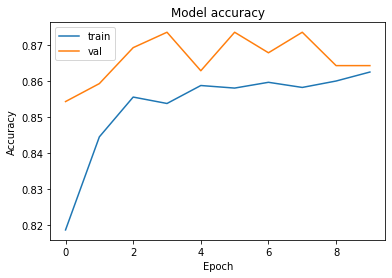

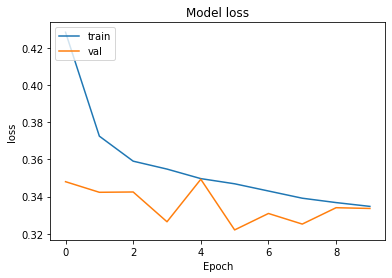

In [32]:
# training and accuracy value
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='upper left')
plt.show()

# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')
plt.show()

### plot confusion marix

In [33]:
from mlxtend.plotting import plot_confusion_matrix

In [34]:
from sklearn.metrics import confusion_matrix

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

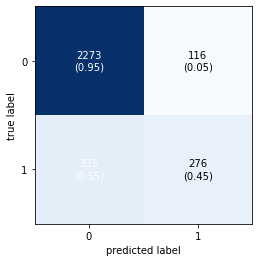

In [35]:
acc = model.evaluate(x_test,y_test.to_numpy())
print("Accuracy with ANN is : " + str(acc[1]))
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True)
plt.show()

**Model 2**

In [36]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Acuuracy with Random forest is : 0.8623333333333333


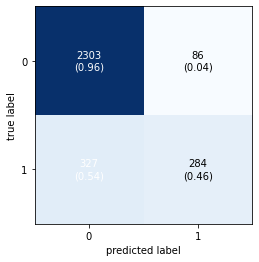

In [37]:
import numpy as np
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
acc = np.sum(pred==y_test)/len(y_test)
print("Acuuracy with Random forest is : " + str(acc))

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True)
plt.show()

In [38]:
from sklearn.naive_bayes import GaussianNB

Acuuracy with Naive Bayes is : 0.20366666666666666


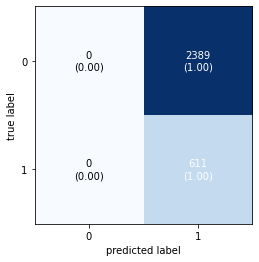

In [39]:
model3 = GaussianNB()
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
acc = np.sum(pred==y_test)/len(y_test)
print("Acuuracy with Naive Bayes is : " + str(acc))

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True)
plt.show()

Acuuracy with SVM is : 0.8503333333333334


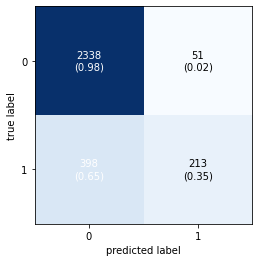

In [40]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(x_train,y_train)
pred = model4.predict(x_test)
acc = np.sum(pred==y_test)/len(y_test)
print("Acuuracy with SVM is : " + str(acc))

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True)
plt.show()

Acuuracy with GradientBoosting is : 0.8546666666666667


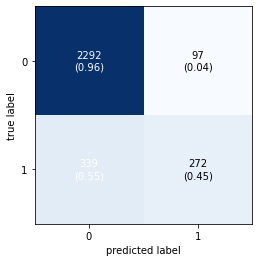

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier()
model5.fit(x_train,y_train)
pred = model5.predict(x_test)
acc = np.sum(pred==y_test)/len(y_test)
print("Acuuracy with GradientBoosting is : " + str(acc))

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True)
plt.show()